In [122]:
# Libs and dataset loading

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import pickle

DATA ANALYSYS

In [103]:
# Prints dataframe shape and data
dataset = pd.read_csv("Iris.csv", delimiter=",", encoding="UTF8")
print ("shape : ", dataset.shape)
dataset

shape :  (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [104]:
# Drops Id and show dataset statistics
dataset = dataset.drop("Id", axis=1)
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [105]:
# Shows labels
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [106]:
# Splits dataframe to train and test dataframes
train, test = train_test_split(dataset, 
                               test_size = 0.2, 
                               stratify = dataset['Species'], 
                               random_state = 42)
train.shape

(120, 5)

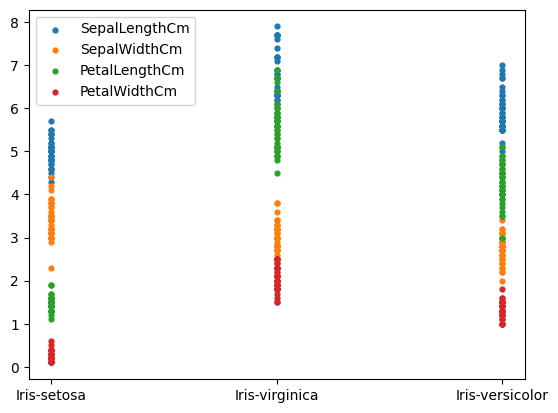

In [107]:
# Shows attributes values ordered by Species

fig, axs = plt.subplots()
plt.scatter(train["Species"],train["SepalLengthCm"] , s=12, marker='o')
plt.scatter(train["Species"],train["SepalWidthCm"] , s=12, marker='o')
plt.scatter(train["Species"],train["PetalLengthCm"] , s=12, marker='o')
plt.scatter(train["Species"],train["PetalWidthCm"] , s=12, marker='o')
plt.legend(["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"])

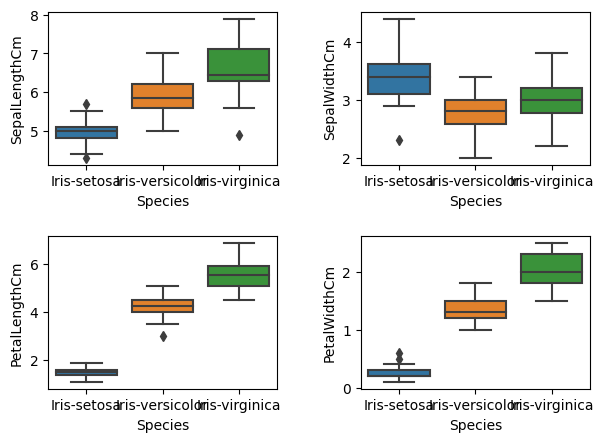

In [108]:
# Shows side by side box plots

fig, axs = plt.subplots(2, 2)
fn = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
cn = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = train, order = cn, ax = axs[0,0])
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = train, order = cn, ax = axs[0,1])
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = train, order = cn, ax = axs[1,0])
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = train,  order = cn, ax = axs[1,1])
fig.tight_layout(pad=2.0)

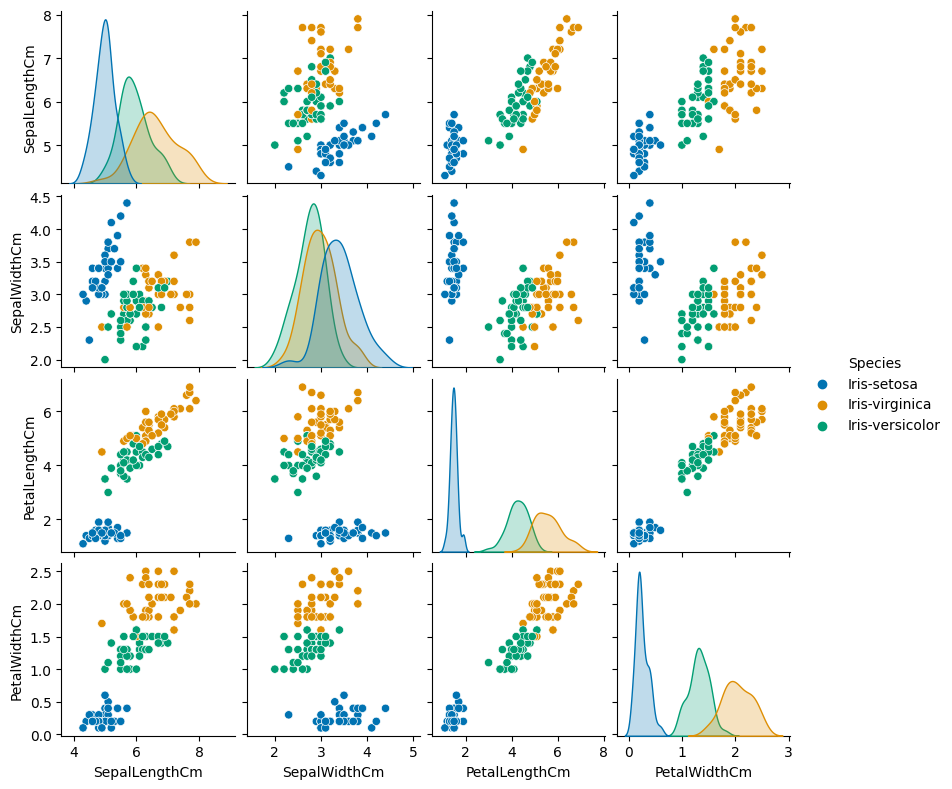

In [109]:
# shows all paired attributes

sns.pairplot(train, hue="Species", height = 2, palette = 'colorblind')

C:\Users\mherc\AppData\Local\Temp\ipykernel_11928\1679960074.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr()


<Axes: >

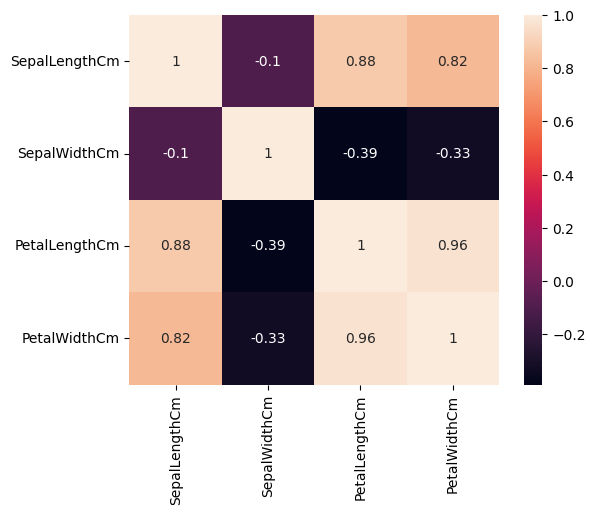

In [110]:
# Shows correlation matrix

corrmat = train.corr()
sns.heatmap(corrmat, annot = True, square = True)

<Axes: >

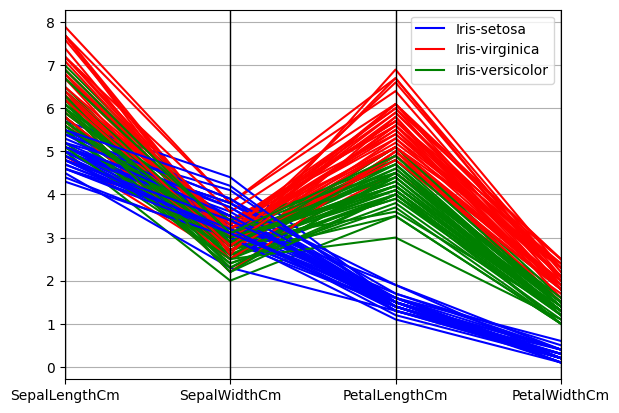

In [111]:
# Parallel coordinates shows vectors as a line

parallel_coordinates(train, "Species", color = ['blue', 'red', 'green'])

CLASSIFIERS TESTING

In [112]:
# Separate out features and class labels

X_train = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_train = train.Species
X_test = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_test = test.Species

In [113]:
results = {"Model name": [],
           "Accuracy": []
          }

    DECISION TREE

In [114]:
dt = DecisionTreeClassifier(max_depth = 3, random_state =1)
dt.fit(X_train,y_train)
dt_prediction = dt.predict(X_test)
dt_acc = metrics.accuracy_score(dt_prediction,y_test)
print("The accuracy of the Decision Tree is, {:.3f}".format(dt_acc))
results["Model name"].append('Decision Tree')
results["Accuracy"].append(dt_acc)

The accuracy of the Decision Tree is, 0.967


In [115]:
dt.feature_importances_

array([0.        , 0.        , 0.06071875, 0.93928125])

[Text(0.375, 0.875, 'PetalWidthCm <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]\nclass = Iris-setosa'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = Iris-setosa'),
 Text(0.5, 0.625, 'PetalWidthCm <= 1.65\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]\nclass = Iris-versicolor'),
 Text(0.25, 0.375, 'PetalLengthCm <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]\nclass = Iris-versicolor'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]\nclass = Iris-versicolor'),
 Text(0.375, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(0.75, 0.375, 'PetalLengthCm <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]\nclass = Iris-virginica'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = Iris-virginica'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]\nclass = Iris-virginica')]

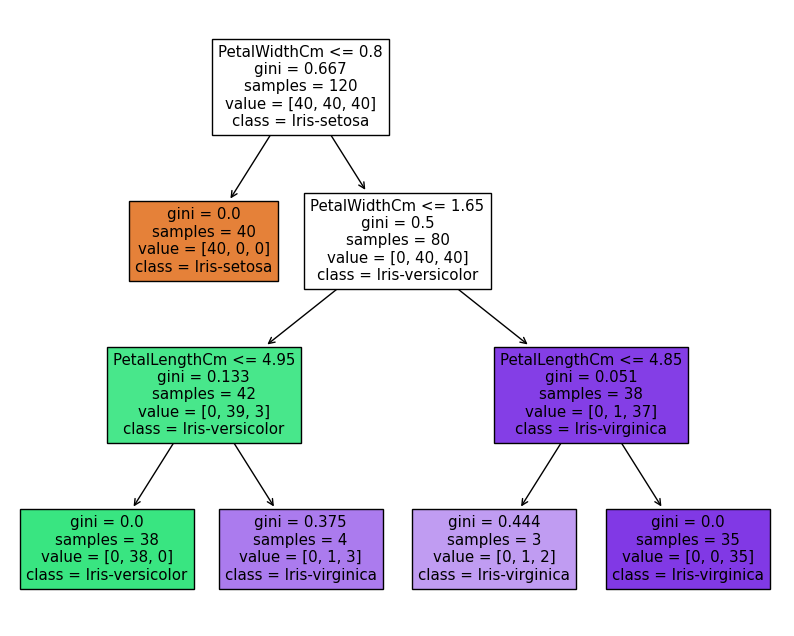

In [116]:
plt.figure(figsize = (10,8))
plot_tree(dt, feature_names = fn, class_names = cn, filled = True)

    NAIVE BAYES

In [117]:
naive = GaussianNB()
naive.fit(X_train,y_train)
naive_prediction = naive.predict(X_test)
naive_acc = metrics.accuracy_score(naive_prediction,y_test)
print("The accuracy of the Gaussian Naive Bayes is, {:.3f}".format(naive_acc))
results["Model name"].append('Gaussian Naive Bayes')
results["Accuracy"].append(naive_acc)


The accuracy of the Gaussian Naive Bayes is, 0.967


    K Neightbors Classifier

In [118]:
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train,y_train)
knc_prediction = knc.predict(X_test)
knc_acc = metrics.accuracy_score(knc_prediction,y_test)
print("The accuracy of the K Neightbors Classifier is, {:.3f}".format(knc_acc))
results["Model name"].append('K Neightbors Classifier')
results["Accuracy"].append(knc_acc)


The accuracy of the K Neightbors Classifier is, 1.000


    SVC

In [119]:
svc = SVC(gamma='auto')
svc.fit(X_train,y_train)
svc_prediction = svc.predict(X_test)
svc_acc = metrics.accuracy_score(svc_prediction,y_test)
print("The accuracy of the C-Support Vector Classification is, {:.3f}".format(svc_acc))
results["Model name"].append('C-Support Vector Classification')
results["Accuracy"].append(svc_acc)


The accuracy of the C-Support Vector Classification is, 0.967


SUMMARY

In [120]:
pd.DataFrame(results)

,Model name,Accuracy
0,Decision Tree,0.966667
1,Gaussian Naive Bayes,0.966667
2,K Neightbors Classifier,1.000000
3,C-Support Vector Classification,0.966667


SAVING THE MOST ACCURATE MODEL

In [123]:
pickle.dump(knc, open('model.pkl', 'wb'))